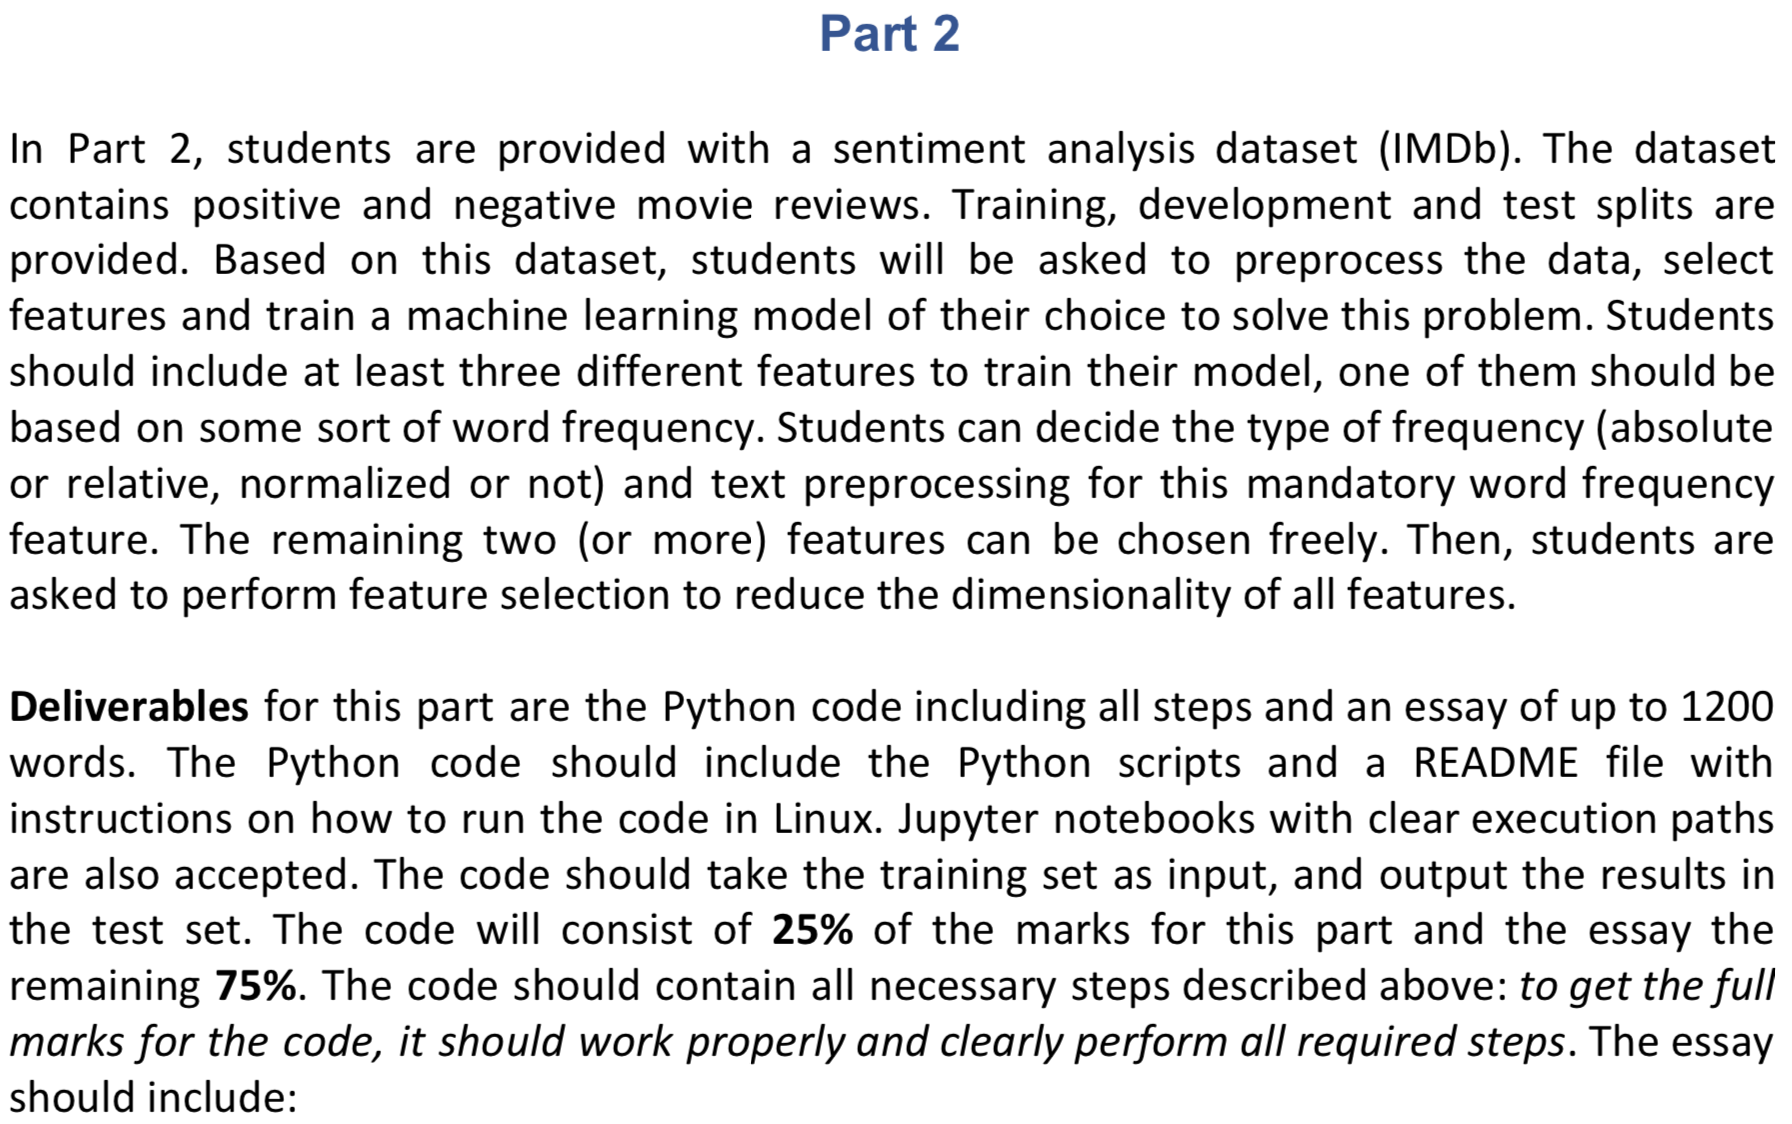

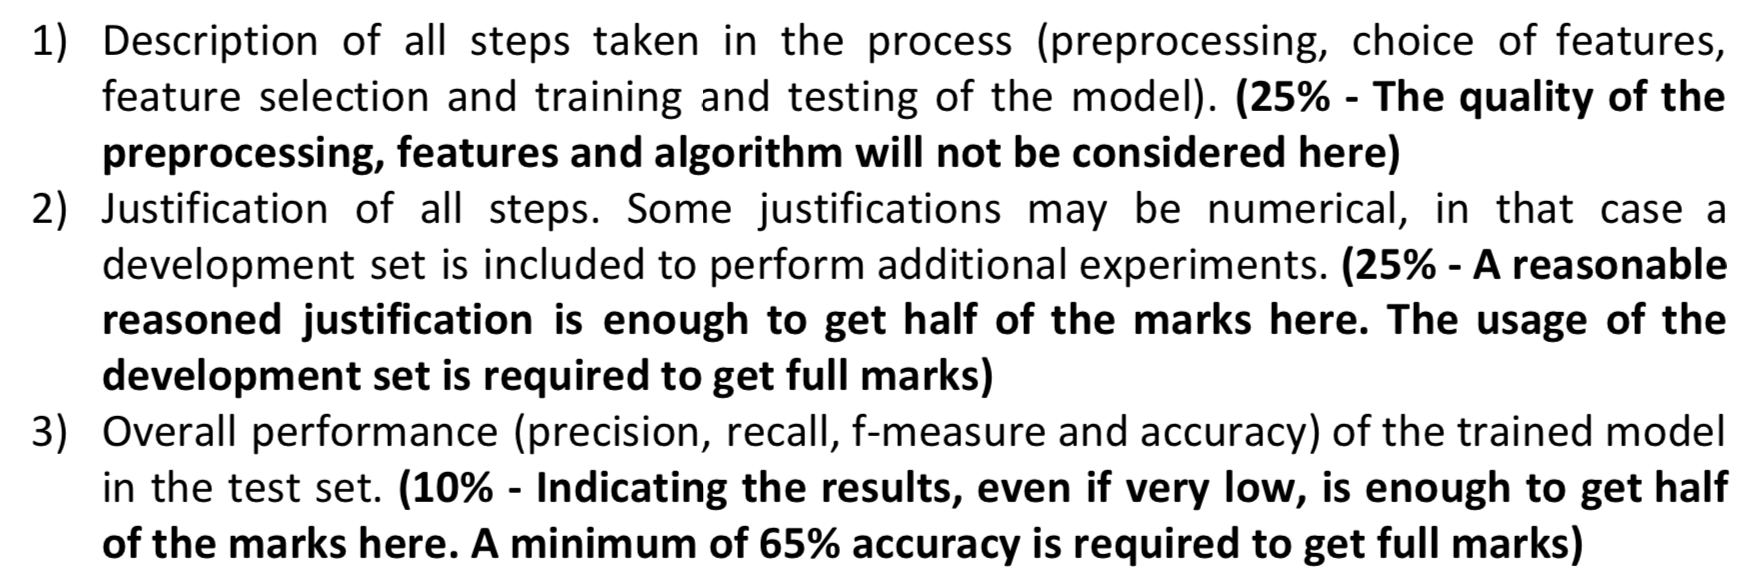

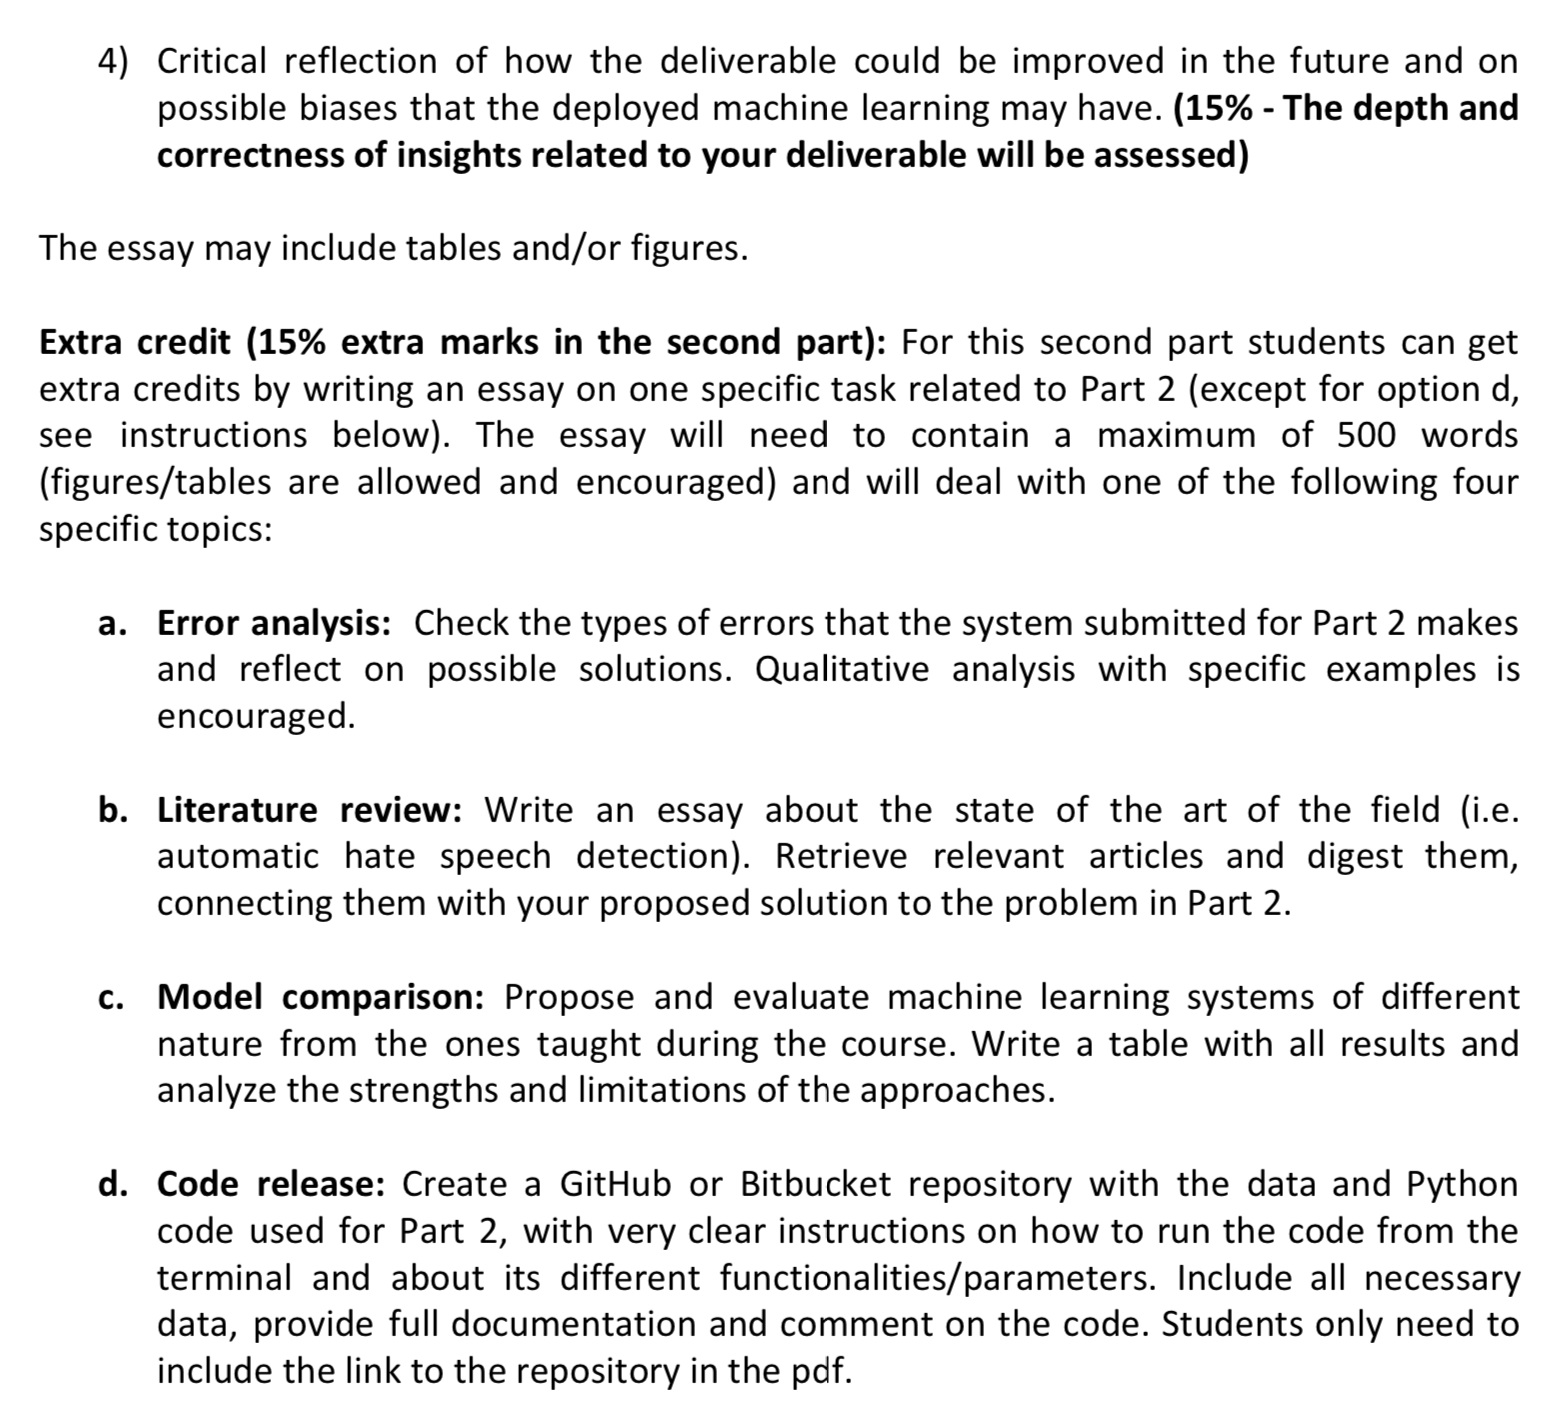

firstly,load the file

In [1]:
import nltk
from nltk.corpus import sentiwordnet as swn
from textblob import TextBlob
import pandas as pd
import numpy as np
from time import time

In [2]:
train_pos = pd.read_csv(r'/Users/byronleung/Downloads/postgraduate study/applied machine learning/coursework/datasets_coursework1/IMDb/train/imdb_train_pos.txt'
                       ,sep = '\n'
                       ,header=None)

train_neg = pd.read_csv(r'/Users/byronleung/Downloads/postgraduate study/applied machine learning/coursework/datasets_coursework1/IMDb/train/imdb_train_neg.txt'
                        ,sep = '\n'
                       ,header=None)
test_pos = pd.read_csv(r'/Users/byronleung/Downloads/postgraduate study/applied machine learning/coursework/datasets_coursework1/IMDb/test/imdb_test_pos.txt'
                      ,sep = '\n'
                      ,header=None)
test_neg = pd.read_csv(r'/Users/byronleung/Downloads/postgraduate study/applied machine learning/coursework/datasets_coursework1/IMDb/test/imdb_test_neg.txt'
                      ,sep = '\n'
                      ,header=None)

adding labels,with positive -- 1,negative -- 0 so the label is binary

In [3]:
train_pos.loc[:,'Positive'] = 1
train_neg.loc[:,'Positive'] = 0
test_pos.loc[:,'Positive'] = 1
test_neg.loc[:,'Positive'] = 0

In [4]:
train_neg

,0,Positive
0,"A terrible deception: controversial film, winn...",0
1,Well I guess I know the answer to that questio...,0
2,I really liked the movie 'The Emporer's New Gr...,0
3,Thats what this movie really takes. A big piec...,0
4,I was looking for a documentary of the same jo...,0
...,...,...
7512,This is perhaps the worst movie I have ever se...,0
7513,I was so looking forward to seeing this film t...,0
7514,It pains me to see an awesome movie turn into ...,0
7515,Grande Ecole is not an artful exploration of m...,0


In [5]:
train = pd.concat([train_neg,train_pos],axis =0,keys=['Negative','Positive']
                  ,ignore_index=True)#this is the point,i cost lot of time to debug!we need to ignore the index of 
#original dataframe!
test = pd.concat([test_neg,test_pos],axis = 0,keys=['Negative','Positive']
                ,ignore_index=True)

In [6]:
train.rename(columns={0:'Sentence'},inplace = True)
test.rename(columns={0:'Sentence'},inplace = True)

In [7]:
train

,Sentence,Positive
0,"A terrible deception: controversial film, winn...",0
1,Well I guess I know the answer to that questio...,0
2,I really liked the movie 'The Emporer's New Gr...,0
3,Thats what this movie really takes. A big piec...,0
4,I was looking for a documentary of the same jo...,0
...,...,...
14995,"I thought Rachel York was fantastic as ""Lucy.""...",1
14996,I watched Princess of the Nile for the first t...,1
14997,This is a good film for die-hard Chucky fans. ...,1
14998,"Based on the book ""Space Vampires"" by Colin Wi...",1


In [8]:
#lowercase all the words in ’Sentence‘
total_set = [train,test]
for i in total_set:
    i['Sentence'] = i['Sentence'].str.lower()

In [9]:
train

,Sentence,Positive
0,"a terrible deception: controversial film, winn...",0
1,well i guess i know the answer to that questio...,0
2,i really liked the movie 'the emporer's new gr...,0
3,thats what this movie really takes. a big piec...,0
4,i was looking for a documentary of the same jo...,0
...,...,...
14995,"i thought rachel york was fantastic as ""lucy.""...",1
14996,i watched princess of the nile for the first t...,1
14997,this is a good film for die-hard chucky fans. ...,1
14998,"based on the book ""space vampires"" by colin wi...",1


In [10]:
#word tokenize
import nltk
total_set = [train,test]
for i in total_set:
    def identify_tokens(i):
        text = i['Sentence']
        tokens = nltk.word_tokenize(text)
        # taken only words (not punctuation)
        token_words = [w for w in tokens if w.isalpha()]
        return token_words
    i['Word'] = i.apply(identify_tokens, axis=1)

In [11]:
train

,Sentence,Positive,Word
0,"a terrible deception: controversial film, winn...",0,"[a, terrible, deception, controversial, film, ..."
1,well i guess i know the answer to that questio...,0,"[well, i, guess, i, know, the, answer, to, tha..."
2,i really liked the movie 'the emporer's new gr...,0,"[i, really, liked, the, movie, emporer, new, g..."
3,thats what this movie really takes. a big piec...,0,"[thats, what, this, movie, really, takes, a, b..."
4,i was looking for a documentary of the same jo...,0,"[i, was, looking, for, a, documentary, of, the..."
...,...,...,...
14995,"i thought rachel york was fantastic as ""lucy.""...",1,"[i, thought, rachel, york, was, fantastic, as,..."
14996,i watched princess of the nile for the first t...,1,"[i, watched, princess, of, the, nile, for, the..."
14997,this is a good film for die-hard chucky fans. ...,1,"[this, is, a, good, film, for, chucky, fans, o..."
14998,"based on the book ""space vampires"" by colin wi...",1,"[based, on, the, book, space, vampires, by, co..."


In [12]:
#transfer all words into their etyma
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
for i in total_set:
    def stem_list(i):
        words_list = i['Word']
        stemmed_list = [stemming.stem(word) for word in words_list]
        return (stemmed_list)
    i['Stemmed_words'] = i.apply(stem_list, axis=1)

In [13]:
train

,Sentence,Positive,Word,Stemmed_words
0,"a terrible deception: controversial film, winn...",0,"[a, terrible, deception, controversial, film, ...","[a, terribl, decept, controversi, film, winner..."
1,well i guess i know the answer to that questio...,0,"[well, i, guess, i, know, the, answer, to, tha...","[well, i, guess, i, know, the, answer, to, tha..."
2,i really liked the movie 'the emporer's new gr...,0,"[i, really, liked, the, movie, emporer, new, g...","[i, realli, like, the, movi, empor, new, groov..."
3,thats what this movie really takes. a big piec...,0,"[thats, what, this, movie, really, takes, a, b...","[that, what, thi, movi, realli, take, a, big, ..."
4,i was looking for a documentary of the same jo...,0,"[i, was, looking, for, a, documentary, of, the...","[i, wa, look, for, a, documentari, of, the, sa..."
...,...,...,...,...
14995,"i thought rachel york was fantastic as ""lucy.""...",1,"[i, thought, rachel, york, was, fantastic, as,...","[i, thought, rachel, york, wa, fantast, as, lu..."
14996,i watched princess of the nile for the first t...,1,"[i, watched, princess, of, the, nile, for, the...","[i, watch, princess, of, the, nile, for, the, ..."
14997,this is a good film for die-hard chucky fans. ...,1,"[this, is, a, good, film, for, chucky, fans, o...","[thi, is, a, good, film, for, chucki, fan, oka..."
14998,"based on the book ""space vampires"" by colin wi...",1,"[based, on, the, book, space, vampires, by, co...","[base, on, the, book, space, vampir, by, colin..."


In [14]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
type(stopwords)

set

In [15]:
#removing stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
for i in total_set:
    def remove_stopwords(i):
        original = i['Stemmed_words']
        meaningful_words = [w for w in original if not w in stopwords]
        return (meaningful_words)
    i['stem'] = i.apply(remove_stopwords, axis=1)

In [16]:
train

,Sentence,Positive,Word,Stemmed_words,stem
0,"a terrible deception: controversial film, winn...",0,"[a, terrible, deception, controversial, film, ...","[a, terribl, decept, controversi, film, winner...","[terribl, decept, controversi, film, winner, t..."
1,well i guess i know the answer to that questio...,0,"[well, i, guess, i, know, the, answer, to, tha...","[well, i, guess, i, know, the, answer, to, tha...","[well, guess, know, answer, question, money, b..."
2,i really liked the movie 'the emporer's new gr...,0,"[i, really, liked, the, movie, emporer, new, g...","[i, realli, like, the, movi, empor, new, groov...","[realli, like, movi, empor, new, groov, watch,..."
3,thats what this movie really takes. a big piec...,0,"[thats, what, this, movie, really, takes, a, b...","[that, what, thi, movi, realli, take, a, big, ...","[thi, movi, realli, take, big, piec, cheez, th..."
4,i was looking for a documentary of the same jo...,0,"[i, was, looking, for, a, documentary, of, the...","[i, wa, look, for, a, documentari, of, the, sa...","[wa, look, documentari, journalist, qualiti, f..."
...,...,...,...,...,...
14995,"i thought rachel york was fantastic as ""lucy.""...",1,"[i, thought, rachel, york, was, fantastic, as,...","[i, thought, rachel, york, wa, fantast, as, lu...","[thought, rachel, york, wa, fantast, luci, see..."
14996,i watched princess of the nile for the first t...,1,"[i, watched, princess, of, the, nile, for, the...","[i, watch, princess, of, the, nile, for, the, ...","[watch, princess, nile, first, time, wa, year,..."
14997,this is a good film for die-hard chucky fans. ...,1,"[this, is, a, good, film, for, chucky, fans, o...","[thi, is, a, good, film, for, chucki, fan, oka...","[thi, good, film, chucki, fan, okay, sure, goo..."
14998,"based on the book ""space vampires"" by colin wi...",1,"[based, on, the, book, space, vampires, by, co...","[base, on, the, book, space, vampir, by, colin...","[base, book, space, vampir, colin, wilson, thi..."


In [17]:
for i in total_set:
    def rejoin_words(i):
        list = i['stem']
        joined_words = (' '.join(list))
        return joined_words
    i['Combination'] = i.apply(rejoin_words, axis=1)

In [18]:
train

,Sentence,Positive,Word,Stemmed_words,stem,Combination
0,"a terrible deception: controversial film, winn...",0,"[a, terrible, deception, controversial, film, ...","[a, terribl, decept, controversi, film, winner...","[terribl, decept, controversi, film, winner, t...",terribl decept controversi film winner teddi b...
1,well i guess i know the answer to that questio...,0,"[well, i, guess, i, know, the, answer, to, tha...","[well, i, guess, i, know, the, answer, to, tha...","[well, guess, know, answer, question, money, b...",well guess know answer question money bombard ...
2,i really liked the movie 'the emporer's new gr...,0,"[i, really, liked, the, movie, emporer, new, g...","[i, realli, like, the, movi, empor, new, groov...","[realli, like, movi, empor, new, groov, watch,...",realli like movi empor new groov watch thi wa ...
3,thats what this movie really takes. a big piec...,0,"[thats, what, this, movie, really, takes, a, b...","[that, what, thi, movi, realli, take, a, big, ...","[thi, movi, realli, take, big, piec, cheez, th...",thi movi realli take big piec cheez thi movi s...
4,i was looking for a documentary of the same jo...,0,"[i, was, looking, for, a, documentary, of, the...","[i, wa, look, for, a, documentari, of, the, sa...","[wa, look, documentari, journalist, qualiti, f...",wa look documentari journalist qualiti frontli...
...,...,...,...,...,...,...
14995,"i thought rachel york was fantastic as ""lucy.""...",1,"[i, thought, rachel, york, was, fantastic, as,...","[i, thought, rachel, york, wa, fantast, as, lu...","[thought, rachel, york, wa, fantast, luci, see...",thought rachel york wa fantast luci seen kiss ...
14996,i watched princess of the nile for the first t...,1,"[i, watched, princess, of, the, nile, for, the...","[i, watch, princess, of, the, nile, for, the, ...","[watch, princess, nile, first, time, wa, year,...",watch princess nile first time wa year old nev...
14997,this is a good film for die-hard chucky fans. ...,1,"[this, is, a, good, film, for, chucky, fans, o...","[thi, is, a, good, film, for, chucki, fan, oka...","[thi, good, film, chucki, fan, okay, sure, goo...",thi good film chucki fan okay sure good child ...
14998,"based on the book ""space vampires"" by colin wi...",1,"[based, on, the, book, space, vampires, by, co...","[base, on, the, book, space, vampir, by, colin...","[base, book, space, vampir, colin, wilson, thi...",base book space vampir colin wilson thi humbl ...


In [19]:
train.columns.values.tolist()

['Sentence', 'Positive', 'Word', 'Stemmed_words', 'stem', 'Combination']

In [20]:
#drop columns
for i in total_set:
    i.drop(['Sentence', 'Word', 'Stemmed_words', 'stem']
          ,axis = 1
          ,inplace = True)

In [21]:
train

,Positive,Combination
0,0,terribl decept controversi film winner teddi b...
1,0,well guess know answer question money bombard ...
2,0,realli like movi empor new groov watch thi wa ...
3,0,thi movi realli take big piec cheez thi movi s...
4,0,wa look documentari journalist qualiti frontli...
...,...,...
14995,1,thought rachel york wa fantast luci seen kiss ...
14996,1,watch princess nile first time wa year old nev...
14997,1,thi good film chucki fan okay sure good child ...
14998,1,base book space vampir colin wilson thi humbl ...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer#use countervectorizer to count words'frequence
CV = CountVectorizer(stop_words='english'
#delete stopwords again,because I am concerning the dataset of stopwords in nltk and sklearn are different
                            )

In [23]:
time0 = time()
_train = CV.fit_transform(train['Combination'])
X_train = pd.DataFrame(_train.toarray())
print(time()-time0)

3.059830904006958


In [24]:
time0 = time()
_test = CV.fit_transform(test['Combination'])
X_test =  pd.DataFrame(_test.toarray())
print(time()-time0)

0.8916869163513184


In [87]:
X_train.shape

(15000, 38617)

In [88]:
X_test.shape

(5000, 24489)

In [25]:
#I tried to used PCA for dimension reduction
#just in order to see how many conponents remain after dimension reduction
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
time0 = time()
pca_line = PCA().fit(X_train)
#not reduce the dimension at the moment,just transfer data to another vector space
#time -- warning:it is time-consuming
plt.figure(figsize = (20,5))
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel('number of conponents after dimension reduction')
plt.ylabel('cumulative explained variance ratio')
plt.show()
print(time()-time0)

<Figure size 2000x500 with 1 Axes>

1869.076269865036


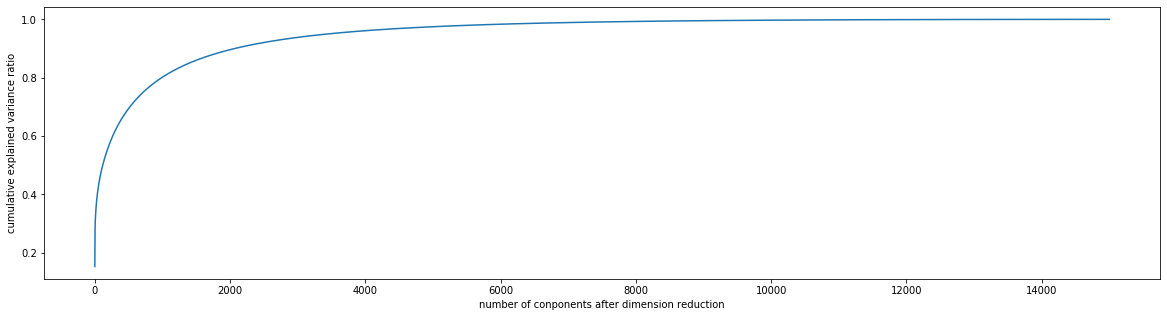

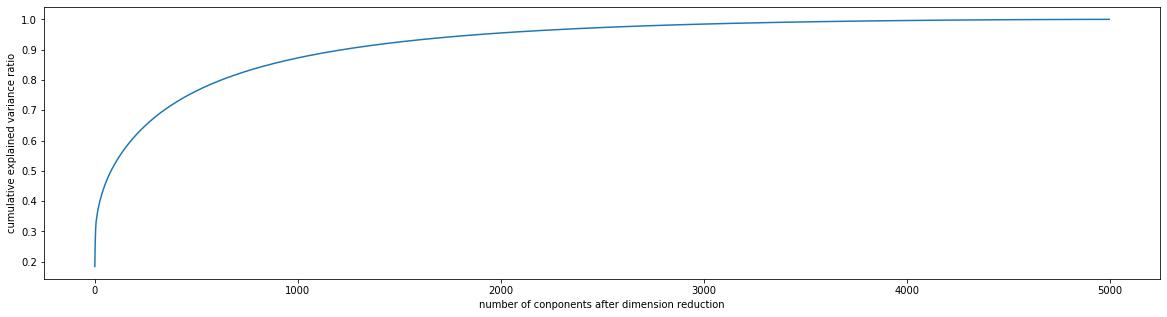

96.46556973457336


In [26]:
time0 = time()
pca_line = PCA().fit(X_test)
plt.figure(figsize = (20,5))
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel('number of conponents after dimension reduction')
plt.ylabel('cumulative explained variance ratio')
plt.show()
print(time()-time0)

As graphs shown above.We could see in 5000 dimensions,training set could still remained 95% variance approximately.

#### The training set must have the same dimensions as the test set

In [27]:
time0 = time()
Xtrain = PCA(n_components=5000).fit_transform(X_train)
print(time()-time0)

1176.063404083252


In [28]:
time0 = time()
Xtest = PCA(n_components=5000).fit_transform(X_test)#
print(time()-time0)

85.04836010932922


In [29]:
Xtrain = pd.DataFrame(Xtrain)

In [30]:
Xtest = pd.DataFrame(Xtest)

In [31]:
Xtrain

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,-3.947880,-0.529089,4.395190,1.034540,-1.446308,2.893938,0.242372,0.357249,0.352435,-1.242499,...,-0.065514,-0.042879,-0.016860,-0.128990,0.016833,-0.004855,0.030524,0.027367,-0.034921,0.030135
1,-3.588358,-1.620679,-0.525036,1.250313,0.573338,0.174473,1.045478,1.006900,0.796046,-1.737986,...,0.079812,-0.017441,0.035804,-0.021559,0.008613,0.014209,0.026011,0.052503,-0.053564,0.003387
2,-3.527883,-2.689420,-3.135221,1.440096,-0.195512,-0.149079,1.362309,2.499446,-0.702045,1.217624,...,0.041373,-0.034035,0.008373,-0.044513,-0.065240,0.040975,0.011892,-0.054134,0.048925,-0.027536
3,-3.605156,-1.408007,0.511968,-0.907745,1.086451,-0.291520,0.272025,1.929441,0.401185,0.073823,...,-0.044453,-0.060904,0.055791,0.030855,0.115489,-0.055503,-0.035986,0.102953,-0.109494,0.012693
4,9.901082,-6.293649,-1.400680,5.082148,3.568961,0.887122,-1.256863,-1.669071,-0.370549,-1.034573,...,-0.004524,-0.002583,-0.002424,-0.002522,-0.046632,0.029533,-0.018617,-0.011544,0.002840,-0.027650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3.576191,-2.862651,-2.504581,7.567459,0.245636,1.318184,2.809536,-2.092377,0.012113,1.173674,...,-0.034857,-0.006805,0.021128,-0.026514,0.036914,0.009445,0.015305,0.010773,0.006310,-0.024115
14996,-4.060468,-1.836850,-3.926101,1.690783,0.468460,2.622630,-1.175879,-0.015593,-1.385547,-0.096120,...,-0.035926,0.035121,-0.017712,0.004226,-0.032452,-0.032325,0.004500,-0.037353,0.013034,0.077586
14997,3.441146,1.522778,-1.658036,-2.427546,-0.670396,0.629978,-0.967881,0.150213,2.110122,0.758912,...,0.004070,0.001749,0.057963,0.003511,0.002033,0.057753,0.048274,-0.039823,0.022470,-0.029255
14998,-0.722238,1.211029,1.705594,0.539092,-1.981644,-0.395076,-1.350501,-0.041770,0.175311,-0.092533,...,-0.063401,-0.043666,-0.048005,-0.032572,-0.042100,0.011635,0.007014,0.024874,-0.090398,-0.067755


In [32]:
train.shape

(15000, 2)

### Adding sentiment score and subjectivity as another feature.

In [33]:
import os
Xtrain['Sentiment'] = None
Xtrain['Subjectivity'] = None
i=0
for i in range(train.shape[0]):
    testimonial = TextBlob(str(train.loc[i,'Combination']))
    Xtrain.loc[i,'Sentiment'] = testimonial.sentiment.polarity
    Xtrain.loc[i,'Subjectivity'] = testimonial.sentiment.subjectivity
    i+=1

In [34]:
Xtrain

,0,1,2,3,4,5,6,7,8,9,...,4992,4993,4994,4995,4996,4997,4998,4999,Sentiment,Subjectivity
0,-3.947880,-0.529089,4.395190,1.034540,-1.446308,2.893938,0.242372,0.357249,0.352435,-1.242499,...,-0.016860,-0.128990,0.016833,-0.004855,0.030524,0.027367,-0.034921,0.030135,0.250486,0.523819
1,-3.588358,-1.620679,-0.525036,1.250313,0.573338,0.174473,1.045478,1.006900,0.796046,-1.737986,...,0.035804,-0.021559,0.008613,0.014209,0.026011,0.052503,-0.053564,0.003387,0.05,0.481944
2,-3.527883,-2.689420,-3.135221,1.440096,-0.195512,-0.149079,1.362309,2.499446,-0.702045,1.217624,...,0.008373,-0.044513,-0.065240,0.040975,0.011892,-0.054134,0.048925,-0.027536,-0.0641558,0.502173
3,-3.605156,-1.408007,0.511968,-0.907745,1.086451,-0.291520,0.272025,1.929441,0.401185,0.073823,...,0.055791,0.030855,0.115489,-0.055503,-0.035986,0.102953,-0.109494,0.012693,-0.143864,0.485
4,9.901082,-6.293649,-1.400680,5.082148,3.568961,0.887122,-1.256863,-1.669071,-0.370549,-1.034573,...,-0.002424,-0.002522,-0.046632,0.029533,-0.018617,-0.011544,0.002840,-0.027650,-0.0619048,0.665873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3.576191,-2.862651,-2.504581,7.567459,0.245636,1.318184,2.809536,-2.092377,0.012113,1.173674,...,0.021128,-0.026514,0.036914,0.009445,0.015305,0.010773,0.006310,-0.024115,0.168948,0.48631
14996,-4.060468,-1.836850,-3.926101,1.690783,0.468460,2.622630,-1.175879,-0.015593,-1.385547,-0.096120,...,-0.017712,0.004226,-0.032452,-0.032325,0.004500,-0.037353,0.013034,0.077586,0.2125,0.283333
14997,3.441146,1.522778,-1.658036,-2.427546,-0.670396,0.629978,-0.967881,0.150213,2.110122,0.758912,...,0.057963,0.003511,0.002033,0.057753,0.048274,-0.039823,0.022470,-0.029255,0.393079,0.502812
14998,-0.722238,1.211029,1.705594,0.539092,-1.981644,-0.395076,-1.350501,-0.041770,0.175311,-0.092533,...,-0.048005,-0.032572,-0.042100,0.011635,0.007014,0.024874,-0.090398,-0.067755,0.116667,0.348333


In [35]:
Xtest['Sentiment'] = None
Xtest['Subjectivity'] = None
i=0
for i in range(test.shape[0]):
    testimonial = TextBlob(str(test.loc[i,'Combination']))
    Xtest.loc[i,'Sentiment'] = testimonial.sentiment.polarity
    Xtest.loc[i,'Subjectivity'] = testimonial.sentiment.subjectivity
    i+=1

In [36]:
Xtest

,0,1,2,3,4,5,6,7,8,9,...,4992,4993,4994,4995,4996,4997,4998,4999,Sentiment,Subjectivity
0,0.858044,2.103460,3.840692,-0.287685,-0.158687,-2.280248,-0.746663,-0.824740,0.789654,-0.455288,...,1.355021e-19,8.944857e-20,4.928130e-20,4.745632e-20,2.087097e-20,4.217157e-20,1.407716e-20,8.819573e-22,-0.0589286,0.48869
1,4.804672,-0.610189,-1.378951,0.397014,4.292011,-2.722369,-1.798988,-2.242641,-0.428914,0.104839,...,1.355021e-19,8.944857e-20,4.928130e-20,4.745632e-20,2.087097e-20,4.217157e-20,1.407716e-20,8.819573e-22,-0.0216398,0.28172
2,4.248303,5.369168,0.821614,-0.341314,-1.184814,1.041680,0.491998,-1.170456,-0.287319,-0.026497,...,1.355021e-19,8.944857e-20,4.928130e-20,4.745632e-20,2.087097e-20,4.217157e-20,1.407716e-20,8.819573e-22,0.0666667,0.706667
3,-3.670105,-2.773039,3.009017,-0.017474,-1.316000,1.922019,-1.630928,-0.453705,1.235971,-0.538388,...,1.355021e-19,8.944857e-20,4.928130e-20,4.745632e-20,2.087097e-20,4.217157e-20,1.407716e-20,8.819573e-22,-0.147475,0.448148
4,1.429440,1.633448,0.539002,-0.569830,-1.492840,1.729243,0.600372,-0.814017,-0.826645,1.160704,...,1.355021e-19,8.944857e-20,4.928130e-20,4.745632e-20,2.087097e-20,4.217157e-20,1.407716e-20,8.819573e-22,-0.14256,0.405655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-3.407683,2.835501,0.827436,0.807902,-0.319099,-0.044369,-0.470928,0.035828,-0.237752,0.559555,...,1.355021e-19,8.944857e-20,4.928130e-20,4.745632e-20,2.087097e-20,4.217157e-20,1.407716e-20,8.819573e-22,0.533333,0.483333
4996,-4.174349,-1.412792,3.192791,2.374243,0.319388,-1.994081,-0.632111,0.342853,-0.049401,0.388254,...,1.355021e-19,8.944857e-20,4.928130e-20,4.745632e-20,2.087097e-20,4.217157e-20,1.407716e-20,8.819573e-22,0.436111,0.589815
4997,-0.262589,-3.231980,-5.101121,0.163630,5.106245,-0.184378,-1.605882,-0.379873,-1.823721,1.260197,...,1.355021e-19,8.944857e-20,4.928130e-20,4.745632e-20,2.087097e-20,4.217157e-20,1.407716e-20,8.819573e-22,0.62193,0.392982
4998,-4.719440,1.074023,0.689751,-0.659656,-0.043135,0.733237,1.141268,-0.082204,0.696175,0.455704,...,1.355021e-19,8.944857e-20,4.928130e-20,4.745632e-20,2.087097e-20,4.217157e-20,1.407716e-20,8.819573e-22,0.192857,0.383333


In [37]:
Ytrain = train.loc[:,'Positive']
Ytest = test.loc[:,'Positive']

### Use SVM as classifier

In [38]:
from sklearn import svm
from sklearn.svm import SVC
import datetime

#### in order to avoid the impact of fundamental unit,now nondimensionalization

In [39]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(Xtrain)
Xtrain = pd.DataFrame(X)
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,15000.0,2.556474e-17,1.000033,-1.062481,-0.992791,-0.928294,-0.870314,-0.719785,-0.309536,0.425239,1.274566,3.417806,18.501487
1,15000.0,1.189049e-16,1.000033,-8.025275,-3.125140,-1.703966,-1.176583,-0.470863,0.125132,0.592641,1.003161,2.064184,13.325704
2,15000.0,4.473459e-17,1.000033,-7.771763,-2.542173,-1.551236,-1.123808,-0.527179,-0.002759,0.491803,1.124903,2.886198,9.129842
3,15000.0,2.614945e-17,1.000033,-5.867195,-2.317756,-1.378552,-1.019024,-0.552614,-0.097595,0.425934,1.166791,3.127834,8.367771
4,15000.0,1.334562e-16,1.000033,-6.749790,-2.010385,-1.220788,-0.906953,-0.486426,-0.121265,0.281977,1.024688,3.537584,16.288368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,15000.0,3.582320e-17,1.000033,-5.360583,-2.557889,-1.628319,-1.196316,-0.582756,-0.008356,0.576709,1.215329,2.592516,6.450680
4998,15000.0,-5.539273e-17,1.000033,-5.197637,-2.583928,-1.650276,-1.212418,-0.589172,-0.000148,0.595214,1.197680,2.549389,5.794965
4999,15000.0,-2.697102e-17,1.000033,-5.442849,-2.491306,-1.641009,-1.207462,-0.588334,-0.002570,0.582000,1.213366,2.608787,5.587104
5000,15000.0,-7.429864e-15,1.000033,-6.016262,-2.620275,-1.602195,-1.175179,-0.577362,-0.006798,0.585592,1.190543,2.569250,4.851474


In [40]:
from sklearn.preprocessing import StandardScaler
X_ = StandardScaler().fit_transform(Xtest)
Xtest = pd.DataFrame(X_)
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,5000.0,1.990075e-17,1.0001,-0.905062,-8.661171e-01,-8.157612e-01,-7.756660e-01,-6.731778e-01,-3.089032e-01,3.807535e-01,1.141432e+00,3.136457e+00,23.750522
1,5000.0,5.386802e-17,1.0001,-6.349091,-3.231790e+00,-1.743969e+00,-1.194625e+00,-4.807226e-01,1.487680e-01,6.304101e-01,1.012785e+00,1.795793e+00,14.787371
2,5000.0,3.203826e-17,1.0001,-5.679522,-2.816394e+00,-1.710691e+00,-1.170934e+00,-4.951669e-01,1.427830e-02,5.407025e-01,1.150978e+00,2.453623e+00,7.181824
3,5000.0,-2.534084e-18,1.0001,-5.398043,-2.196964e+00,-1.342172e+00,-9.903006e-01,-5.400110e-01,-1.226400e-01,4.008193e-01,1.154221e+00,3.263201e+00,12.048145
4,5000.0,-3.962386e-17,1.0001,-4.459237,-2.074188e+00,-1.242516e+00,-9.235039e-01,-5.106681e-01,-1.279981e-01,3.027963e-01,1.077737e+00,3.647681e+00,10.069832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,5000.0,-3.815381e-17,1.0001,-41.819319,-2.464639e-14,-1.129253e-14,-8.108481e-15,-3.856370e-15,4.832088e-17,3.783574e-15,8.190200e-15,2.324762e-14,41.819319
4998,5000.0,-9.799918e-18,1.0001,-41.214620,-1.787770e-14,-8.640569e-15,-6.347212e-15,-2.912965e-15,-2.413635e-17,2.903595e-15,6.517837e-15,1.663364e-14,41.214620
4999,5000.0,-2.930960e-18,1.0001,-47.547843,-1.250141e-14,-6.339508e-15,-4.399299e-15,-1.965033e-15,1.122240e-17,2.017913e-15,4.357033e-15,1.238511e-14,47.547843
5000,5000.0,-2.990386e-16,1.0001,-5.942155,-2.560598e+00,-1.576293e+00,-1.117654e+00,-5.815980e-01,-3.481443e-02,5.765262e-01,1.205254e+00,2.634736e+00,4.778959


In [41]:
Kernel = ['linear','rbf','sigmoid']
for i in Kernel:
    time0 = time()
    clf= SVC(kernel = i
             , gamma='auto'
            # , degree = 1
             , cache_size=10000
            ).fit(Xtrain,Ytrain)
    print('The accuracy under kernel %s is %f' % (i,clf.score(Xtest,Ytest)))
    print(time()-time0)#calculate how much time them cost respectively

The accuracy under kernel linear is 0.519600
763.161101102829
The accuracy under kernel rbf is 0.573000
1675.4712219238281
The accuracy under kernel sigmoid is 0.565800
1480.0268878936768


In [42]:
from sklearn.ensemble import RandomForestClassifier
time0 = time()
rfc = RandomForestClassifier(random_state=0)
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
print('random forest:{}'.format(score_r))
print(time()-time0)

/Users/byronleung/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random forest:0.5394
10.120038032531738


In [43]:
Xtrain

,0,1,2,3,4,5,6,7,8,9,...,4992,4993,4994,4995,4996,4997,4998,4999,5000,5001
0,-0.697073,-0.167393,1.564156,0.465158,-0.694765,1.762946,0.179703,0.319449,0.347572,-1.243419,...,-0.382068,-2.924009,0.381851,-0.110282,0.693466,0.622352,-0.794518,0.686909,0.778715,0.525108
1,-0.633592,-0.512750,-0.186849,0.562176,0.275415,0.106286,0.775153,0.900360,0.785062,-1.739273,...,0.811369,-0.488706,0.195390,0.322756,0.590947,1.193987,-1.218681,0.077201,-0.310700,0.163038
2,-0.622914,-0.850878,-1.115759,0.647507,-0.093918,-0.090817,1.010062,2.234980,-0.692358,1.218526,...,0.189744,-1.009029,-1.479972,0.930742,0.270168,-1.231085,1.113148,-0.627682,-0.931008,0.337942
3,-0.636558,-0.445465,0.182199,-0.408148,0.521900,-0.177590,0.201689,1.725287,0.395649,0.073877,...,1.264315,0.699439,2.619865,-1.260762,-0.817558,2.341277,-2.491202,0.289333,-1.364130,0.189458
4,1.748222,-1.991183,-0.498473,2.285076,1.714427,0.540422,-0.931881,-1.492467,-0.365436,-1.035339,...,-0.054940,-0.057176,-1.057849,0.670840,-0.422960,-0.262534,0.064616,-0.630279,-0.918776,1.753366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.631444,-0.905685,-0.891328,3.402541,0.117997,0.803019,2.083086,-1.870983,0.011946,1.174544,...,0.478802,-0.601032,0.837398,0.214552,0.347710,0.244990,0.143567,-0.549697,0.335650,0.200781
14996,-0.716952,-0.581142,-1.397217,0.760223,0.225035,1.597669,-0.871836,-0.013943,-1.366429,-0.096191,...,-0.401391,0.095808,-0.736171,-0.734273,0.102237,-0.849457,0.296559,1.768550,0.572303,-1.554241
14997,0.607599,0.481776,-0.590060,-1.091493,-0.322039,0.383773,-0.717620,0.134319,2.081006,0.759474,...,1.313527,0.079591,0.046126,1.311864,1.096736,-0.905633,0.511239,-0.666856,1.553543,0.343470
14998,-0.127525,0.383145,0.606985,0.242391,-0.951926,-0.240675,-1.001308,-0.037350,0.172891,-0.092602,...,-1.087880,-0.738356,-0.955044,0.264298,0.159341,0.565659,-2.056722,-1.544448,0.051558,-0.992222


In [44]:
#remove the impact of 'Sentiment' & 'Subjectivity'
Xtrain_ = Xtrain.drop([5000,5001],axis = 1)
Xtest_ = Xtest.drop([5000,5001],axis = 1)

In [45]:
from sklearn.ensemble import RandomForestClassifier
time0 = time()
rfc = RandomForestClassifier(random_state=0)
rfc = rfc.fit(Xtrain_,Ytrain)
score_r = rfc.score(Xtest_,Ytest)
print('random forest:{}'.format(score_r))
print(time()-time0)

/Users/byronleung/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random forest:0.5062
9.576488018035889


### As the score above,it is obvious that fitness will be worse if 'Sentiment' & 'Subjectivity' were removed 

In [46]:
#remove the impact of word frequency
Xtrain__ = Xtrain.loc[:,[5000,5001]]
Xtest__ = Xtest.loc[:,[5000,5001]]
Xtrain__.rename(columns={5000:'sentiment'},inplace = True)
Xtest__.rename(columns={5000:'sentiment'},inplace = True)

In [47]:
from sklearn.ensemble import RandomForestClassifier
time0 = time()
rfc = RandomForestClassifier(random_state=0)
rfc = rfc.fit(Xtrain__,Ytrain)
score_r = rfc.score(Xtest__,Ytest)
print('random forest:{}'.format(score_r))
print(time()-time0)

random forest:0.6352
0.1834731101989746


/Users/byronleung/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### As the score above,it is obvious that fitness will be better if 'word frequency' were removed 

In [48]:
Xtrain__.head()

,sentiment,5001
0,0.778715,0.525108
1,-0.310700,0.163038
2,-0.931008,0.337942
3,-1.364130,0.189458
4,-0.918776,1.753366


In [49]:
Xtrain__.tail()

,sentiment,5001
14995,0.335650,0.200781
14996,0.572303,-1.554241
14997,1.553543,0.343470
14998,0.051558,-0.992222
14999,0.579927,-0.179707


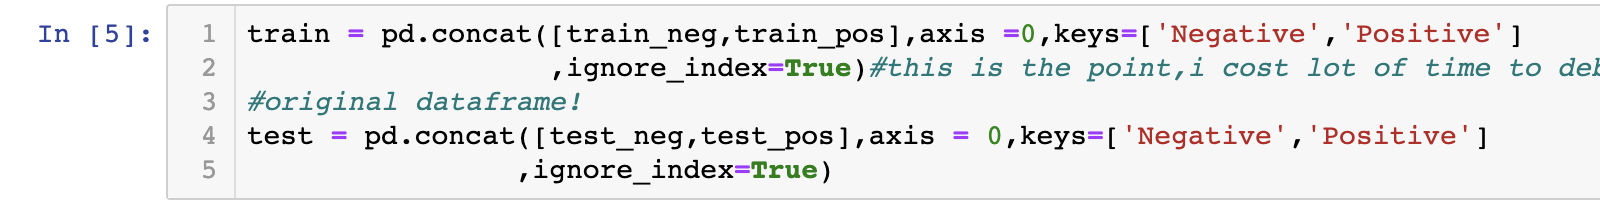

From the previously merged dataframe, it can be seen that the previous table is negative and positive, but the sentiment score is not scored according to the given label.(A negative dataset is assigned a value less than 0, a positive dataset is assigned a value greater than 0)

so,I solved the problem

In [50]:
train_neg.shape

(7517, 2)

In [51]:
senti_train = pd.DataFrame(columns=['Sentiment','Subjectivity'])
i=0
for i in range(train_neg.shape[0]):
    testimonial = TextBlob(str(train.loc[i,'Combination']))
    senti_train.loc[i,'Sentiment'] = testimonial.sentiment.polarity
    senti_train.loc[i,'Subjectivity'] = testimonial.sentiment.subjectivity
    i+=1

In [52]:
senti_train

,Sentiment,Subjectivity
0,0.250486,0.523819
1,0.05,0.481944
2,-0.0641558,0.502173
3,-0.143864,0.485
4,-0.0619048,0.665873
...,...,...
7512,-0.26,0.573333
7513,0.0759259,0.492593
7514,0.0252165,0.382864
7515,0.159621,0.517273


In [53]:
i = 0
for i in range(senti_train.shape[0]): 
    if senti_train.loc[i,'Sentiment'] > 0:
        senti_train.loc[i,'Sentiment'] = senti_train.loc[i,'Sentiment']*(-1)
        i+1

In [54]:
senti_train

,Sentiment,Subjectivity
0,-0.250486,0.523819
1,-0.05,0.481944
2,-0.0641558,0.502173
3,-0.143864,0.485
4,-0.0619048,0.665873
...,...,...
7512,-0.26,0.573333
7513,-0.0759259,0.492593
7514,-0.0252165,0.382864
7515,-0.159621,0.517273


In [55]:
senti_train_ = pd.DataFrame(columns=['Sentiment','Subjectivity'])
for i in range(train_neg.shape[0],train.shape[0]):
    testimonial = TextBlob(str(train.loc[i,'Combination']))
    senti_train_.loc[i,'Sentiment'] = testimonial.sentiment.polarity
    senti_train_.loc[i,'Subjectivity'] = testimonial.sentiment.subjectivity
    i+=1

In [56]:
senti_train_

,Sentiment,Subjectivity
7517,0.314394,0.542424
7518,0.4,0.6625
7519,0.23,0.261667
7520,0.19597,0.385697
7521,0.176111,0.464444
...,...,...
14995,0.168948,0.48631
14996,0.2125,0.283333
14997,0.393079,0.502812
14998,0.116667,0.348333


In [57]:
for i in range(train_neg.shape[0],train.shape[0]): 
    if senti_train_.loc[i,'Sentiment'] < 0:
        senti_train_.loc[i,'Sentiment'] = senti_train_.loc[i,'Sentiment']*(-1)
        i+1

In [58]:
senti_train_

,Sentiment,Subjectivity
7517,0.314394,0.542424
7518,0.4,0.6625
7519,0.23,0.261667
7520,0.19597,0.385697
7521,0.176111,0.464444
...,...,...
14995,0.168948,0.48631
14996,0.2125,0.283333
14997,0.393079,0.502812
14998,0.116667,0.348333


In [59]:
S_train = pd.concat([senti_train,senti_train_],axis = 0)
S_train

,Sentiment,Subjectivity
0,-0.250486,0.523819
1,-0.05,0.481944
2,-0.0641558,0.502173
3,-0.143864,0.485
4,-0.0619048,0.665873
...,...,...
14995,0.168948,0.48631
14996,0.2125,0.283333
14997,0.393079,0.502812
14998,0.116667,0.348333


In [60]:
senti_test = pd.DataFrame(columns=['Sentiment','Subjectivity'])
i=0
for i in range(test_neg.shape[0]):
    testimonial = TextBlob(str(test.loc[i,'Combination']))
    senti_test.loc[i,'Sentiment'] = testimonial.sentiment.polarity
    senti_test.loc[i,'Subjectivity'] = testimonial.sentiment.subjectivity
    i+=1

In [61]:
i = 0
for i in range(senti_test.shape[0]): 
    if senti_test.loc[i,'Sentiment'] > 0:
        senti_test.loc[i,'Sentiment'] = senti_test.loc[i,'Sentiment']*(-1)
        i+1
senti_test

,Sentiment,Subjectivity
0,-0.0589286,0.48869
1,-0.0216398,0.28172
2,-0.0666667,0.706667
3,-0.147475,0.448148
4,-0.14256,0.405655
...,...,...
2496,-0.224384,0.423153
2497,-0.151515,0.630303
2498,-0.0903304,0.428819
2499,-0.112348,0.390374


In [62]:
senti_test_ = pd.DataFrame(columns=['Sentiment','Subjectivity'])
for i in range(test_neg.shape[0],test.shape[0]):
    testimonial = TextBlob(str(test.loc[i,'Combination']))
    senti_test_.loc[i,'Sentiment'] = testimonial.sentiment.polarity
    senti_test_.loc[i,'Subjectivity'] = testimonial.sentiment.subjectivity
    i+=1

In [63]:
a = 0
for a in range(test_neg.shape[0],test.shape[0]): 
    if senti_test_.loc[a,'Sentiment'] < 0:
        senti_test_.loc[a,'Sentiment'] = senti_test_.loc[a,'Sentiment']*(-1)
        a+1
senti_test_

,Sentiment,Subjectivity
2501,0.3,0.616667
2502,0.089881,0.319821
2503,0.380556,0.563889
2504,0.0229647,0.530568
2505,0.31,0.453333
...,...,...
4995,0.533333,0.483333
4996,0.436111,0.589815
4997,0.62193,0.392982
4998,0.192857,0.383333


In [64]:
S_test = pd.concat([senti_test,senti_test_],axis = 0)
S_test

,Sentiment,Subjectivity
0,-0.0589286,0.48869
1,-0.0216398,0.28172
2,-0.0666667,0.706667
3,-0.147475,0.448148
4,-0.14256,0.405655
...,...,...
4995,0.533333,0.483333
4996,0.436111,0.589815
4997,0.62193,0.392982
4998,0.192857,0.383333


In this way, the sign of the value in sentiment corresponds to the label

In [65]:
from sklearn.ensemble import RandomForestClassifier
time0 = time()
rfc = RandomForestClassifier(random_state=0)
rfc = rfc.fit(S_train,Ytrain)
score_r = rfc.score(S_test,Ytest)
print('random forest:{}'.format(score_r))
print(time()-time0)

random forest:0.9952
0.05923819541931152


/Users/byronleung/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


replace new sentiment score from old one

In [66]:
trainX = pd.concat([Xtrain_,S_train],axis = 1)
trainX

,0,1,2,3,4,5,6,7,8,9,...,4992,4993,4994,4995,4996,4997,4998,4999,Sentiment,Subjectivity
0,-0.697073,-0.167393,1.564156,0.465158,-0.694765,1.762946,0.179703,0.319449,0.347572,-1.243419,...,-0.382068,-2.924009,0.381851,-0.110282,0.693466,0.622352,-0.794518,0.686909,-0.250486,0.523819
1,-0.633592,-0.512750,-0.186849,0.562176,0.275415,0.106286,0.775153,0.900360,0.785062,-1.739273,...,0.811369,-0.488706,0.195390,0.322756,0.590947,1.193987,-1.218681,0.077201,-0.05,0.481944
2,-0.622914,-0.850878,-1.115759,0.647507,-0.093918,-0.090817,1.010062,2.234980,-0.692358,1.218526,...,0.189744,-1.009029,-1.479972,0.930742,0.270168,-1.231085,1.113148,-0.627682,-0.0641558,0.502173
3,-0.636558,-0.445465,0.182199,-0.408148,0.521900,-0.177590,0.201689,1.725287,0.395649,0.073877,...,1.264315,0.699439,2.619865,-1.260762,-0.817558,2.341277,-2.491202,0.289333,-0.143864,0.485
4,1.748222,-1.991183,-0.498473,2.285076,1.714427,0.540422,-0.931881,-1.492467,-0.365436,-1.035339,...,-0.054940,-0.057176,-1.057849,0.670840,-0.422960,-0.262534,0.064616,-0.630279,-0.0619048,0.665873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.631444,-0.905685,-0.891328,3.402541,0.117997,0.803019,2.083086,-1.870983,0.011946,1.174544,...,0.478802,-0.601032,0.837398,0.214552,0.347710,0.244990,0.143567,-0.549697,0.168948,0.48631
14996,-0.716952,-0.581142,-1.397217,0.760223,0.225035,1.597669,-0.871836,-0.013943,-1.366429,-0.096191,...,-0.401391,0.095808,-0.736171,-0.734273,0.102237,-0.849457,0.296559,1.768550,0.2125,0.283333
14997,0.607599,0.481776,-0.590060,-1.091493,-0.322039,0.383773,-0.717620,0.134319,2.081006,0.759474,...,1.313527,0.079591,0.046126,1.311864,1.096736,-0.905633,0.511239,-0.666856,0.393079,0.502812
14998,-0.127525,0.383145,0.606985,0.242391,-0.951926,-0.240675,-1.001308,-0.037350,0.172891,-0.092602,...,-1.087880,-0.738356,-0.955044,0.264298,0.159341,0.565659,-2.056722,-1.544448,0.116667,0.348333


In [67]:
testX = pd.concat([Xtest_,S_test],axis = 1)
testX

,0,1,2,3,4,5,6,7,8,9,...,4992,4993,4994,4995,4996,4997,4998,4999,Sentiment,Subjectivity
0,0.136078,0.686319,1.395748,-0.127261,-0.078260,-1.324166,-0.549769,-0.714204,0.755845,-0.440428,...,1.327407e-14,-8.025541e-15,-1.970934e-15,1.659097e-15,9.691938e-15,3.458544e-15,2.916182e-15,-3.881483e-16,-0.0589286,0.48869
1,0.761976,-0.199093,-0.501125,0.175625,2.116697,-1.580911,-1.324596,-1.942071,-0.410550,0.101417,...,-2.340055e-15,1.065105e-14,6.038149e-15,-4.009221e-16,-1.594584e-15,-3.137850e-15,1.548083e-16,-1.364126e-15,-0.0216398,0.28172
2,0.673741,1.751857,0.298583,-0.150985,-0.584316,0.604916,0.362259,-1.013585,-0.275017,-0.025632,...,-1.234013e-14,1.291891e-14,-6.209743e-15,-1.023672e-14,-2.773781e-14,8.425035e-15,3.712202e-15,-1.986297e-15,-0.0666667,0.706667
3,-0.582044,-0.904790,1.093508,-0.007730,-0.649013,1.116139,-1.200854,-0.392897,1.183053,-0.520815,...,3.496084e-15,-3.813224e-15,-8.220599e-15,-2.094255e-15,1.020076e-14,1.206358e-14,-9.060481e-15,-4.044822e-16,-0.147475,0.448148
4,0.226696,0.532963,0.195879,-0.252072,-0.736226,1.004192,0.442054,-0.704918,-0.791252,1.122820,...,-1.066939e-14,1.325786e-14,-1.150134e-14,3.378986e-15,-1.628745e-14,1.806543e-14,-5.935943e-15,1.204575e-15,-0.14256,0.405655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.540426,0.925170,0.300699,0.357386,-0.157371,-0.025765,-0.346744,0.031026,-0.227573,0.541292,...,-2.491703e-14,-1.700550e-14,-1.025915e-14,-1.187486e-14,1.015353e-15,-4.293593e-14,1.888014e-14,3.753858e-15,0.533333,0.483333
4996,-0.662012,-0.460967,1.160294,1.050278,0.157513,-1.157986,-0.465424,0.296902,-0.047286,0.375582,...,-7.395943e-15,-2.026030e-15,-1.446941e-14,-1.206642e-15,-9.329369e-15,8.247415e-15,1.677796e-15,-3.047066e-15,0.436111,0.589815
4997,-0.041644,-1.054533,-1.853801,0.072384,2.518253,-0.107070,-1.182413,-0.328960,-1.745638,1.219066,...,-4.411019e-15,3.637359e-15,-5.805902e-16,4.588642e-15,4.888313e-15,-4.011961e-15,-2.913865e-15,2.189081e-16,0.62193,0.392982
4998,-0.748459,0.350433,0.250663,-0.291808,-0.021273,0.425799,0.840317,-0.071186,0.666369,0.440830,...,8.797872e-15,-5.635492e-15,3.251401e-15,3.816871e-15,2.840133e-15,-7.777913e-15,-3.462047e-15,3.135037e-16,0.192857,0.383333


In [68]:
from sklearn.ensemble import RandomForestClassifier
time0 = time()
rfc = RandomForestClassifier(random_state=0)
rfc = rfc.fit(trainX,Ytrain)
score_r = rfc.score(testX,Ytest)
print('random forest:{}'.format(score_r))
print(time()-time0)

/Users/byronleung/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random forest:0.8142
29.715861082077026


In [69]:
rfc.feature_importances_

array([1.17938343e-03, 8.73816657e-04, 1.36934982e-03, ...,
       2.46299414e-04, 2.61615041e-01, 1.21589934e-04])

In [70]:
from sklearn.preprocessing import StandardScaler
XX = StandardScaler().fit_transform(trainX)
trainX_ = pd.DataFrame(XX)
XX_ = StandardScaler().fit_transform(testX)
testX_ = pd.DataFrame(XX_)

In [79]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
time0 = time()
ratio=pd.DataFrame(columns=['precision','recall','f1','accuracy'])
clf= SVC(kernel = 'rbf'
         , gamma='auto'
        # , degree = 1
         , cache_size=10000
        ).fit(trainX_,Ytrain)
Ycap = clf.predict(testX_)
accuracy_fold=accuracy_score(Ytest, Ycap)      #第一个是真实值第二个是预测值   
precision_fold=precision_score(Ytest, Ycap, average='macro')
recall_fold=recall_score(Ytest, Ycap, average='macro')
f1_fold=f1_score(Ytest, Ycap, average='macro')
ratio=ratio.append(pd.DataFrame({'precision':precision_fold
                                 ,'recall':recall_fold
                                 ,'f1':f1_fold
                                 ,'accuracy':accuracy_fold},index = [1]))
print('The accuracy under kernel %s is %f' % (i,clf.score(testX_,Ytest)))
print(time()-time0)#calculate how much time them cost respectively

The accuracy under kernel 5000 is 0.757200
2022.2480387687683


In [86]:
ratio

,precision,recall,f1,accuracy
1,0.757224,0.757198,0.757193,0.7572


#### parameter optimization

In [ ]:
score = []
gamma_range = np.logspace(-10, 1, 50) 
ratio=pd.DataFrame(columns=['precision','recall','f1','accuracy'])
for i in gamma_range:
    clf = SVC(kernel='rbf'
              ,gamma = i
              ,cache_size=10000).fit(trainX_,Ytrain)
    score.append(clf.score(testX_,Ytest))
    Ycap = clf.predict(testX_)
    accuracy_fold=accuracy_score(Ytest, Ycap_)      #第一个是真实值第二个是预测值   
    precision_fold=precision_score(Ytest, Ycap_, average='macro')
    recall_fold=recall_score(Ytest, Ycap_, average='macro')
    f1_fold=f1_score(Ytest, Ycap_, average='macro')
    ratio=ratio.append(pd.DataFrame({'precision':precision_fold
                                     ,'recall':recall_fold
                                     ,'f1':f1_fold
                                     ,'accuracy':accuracy_fold},index = kernel))
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.grid()
plt.show()

In [ ]:
cellbell.ding()